In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from google.colab import files

In [3]:
col_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
uploaded = files.upload()
file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name, encoding='latin1', low_memory=False, sep=r'\s+', names=col_names)

Saving housing.csv to housing.csv


In [4]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


REGRESSÃO NÃO PARAMÉTRICA A PARTIR DOS CONCEITOS DA JANELA DE DENSIDADE DOS PONTOS


Utilizando O kernel density de Gauss.


O objetivo é comparar uma regressão não paramétrica com um modelo de regressão polinomial

<Axes: ylabel='Frequency'>

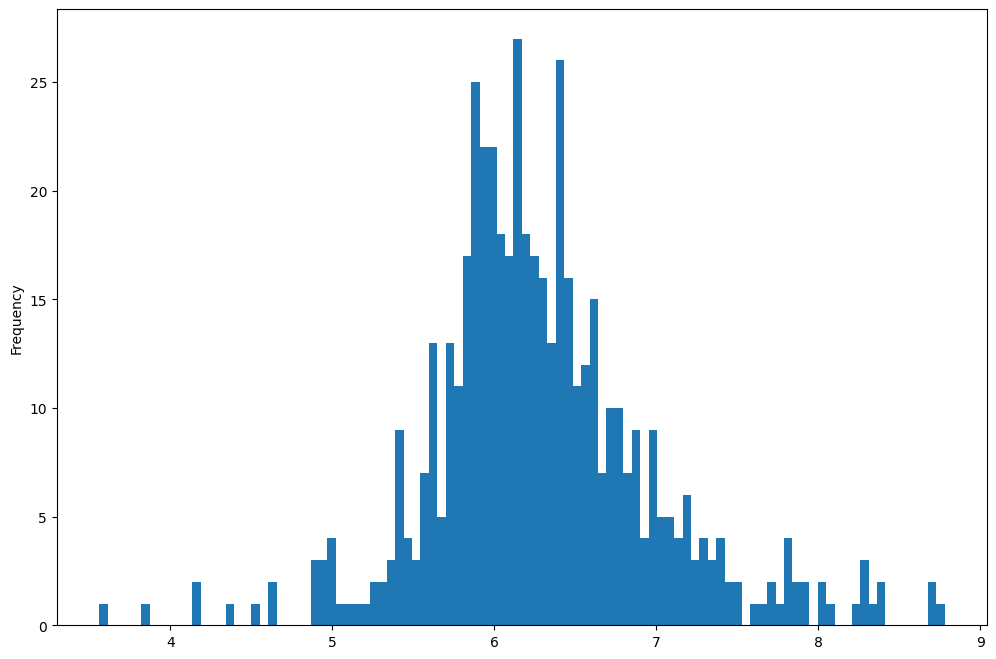

In [8]:
fig, ax = plt.subplots(figsize=(12, 8))
df['RM'].plot(kind='hist', bins=100, ax=ax)

In [38]:
from sklearn.neighbors import KernelDensity
RM = df['RM'].values
kde = KernelDensity(kernel='gaussian', bandwidth=0.3)
kde.fit(RM[:, None])

KernelDensity(bandwidth=0.3)

In [51]:
x_grid = np.linspace(RM.min(), RM.max(), len(RM))
pdf = np.exp(kde.score_samples(x_grid[:, None]))

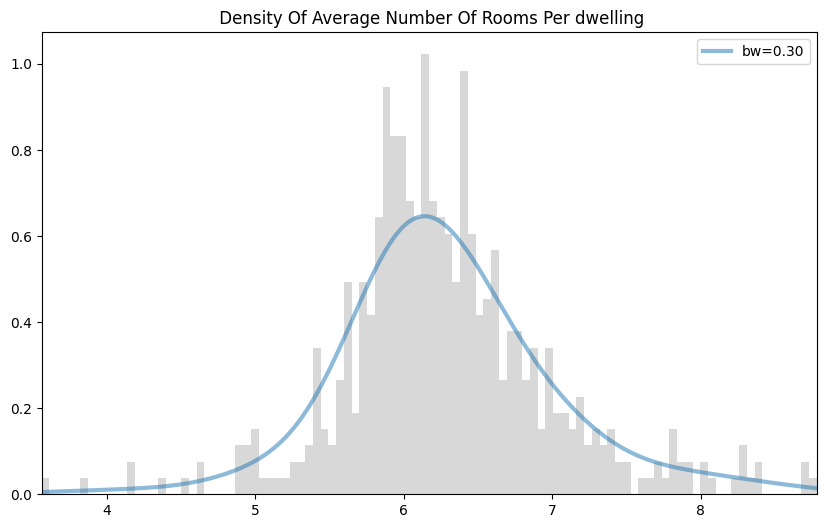

In [52]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(x_grid, pdf, linewidth=3, alpha=0.5, label='bw=%.2f' % kde.bandwidth)
ax.hist(RM, 100, fc='gray', histtype='stepfilled', alpha=0.3, density=True)
ax.legend(loc='upper left')
ax.set_xlim(RM.min(), RM.max());

ax.set_title(" Density Of Average Number Of Rooms Per dwelling")
ax.legend(loc='upper right')

MSE of Polynomial Regression: 2.137258925731476
MSE of Density Model: 0.07994080421712906


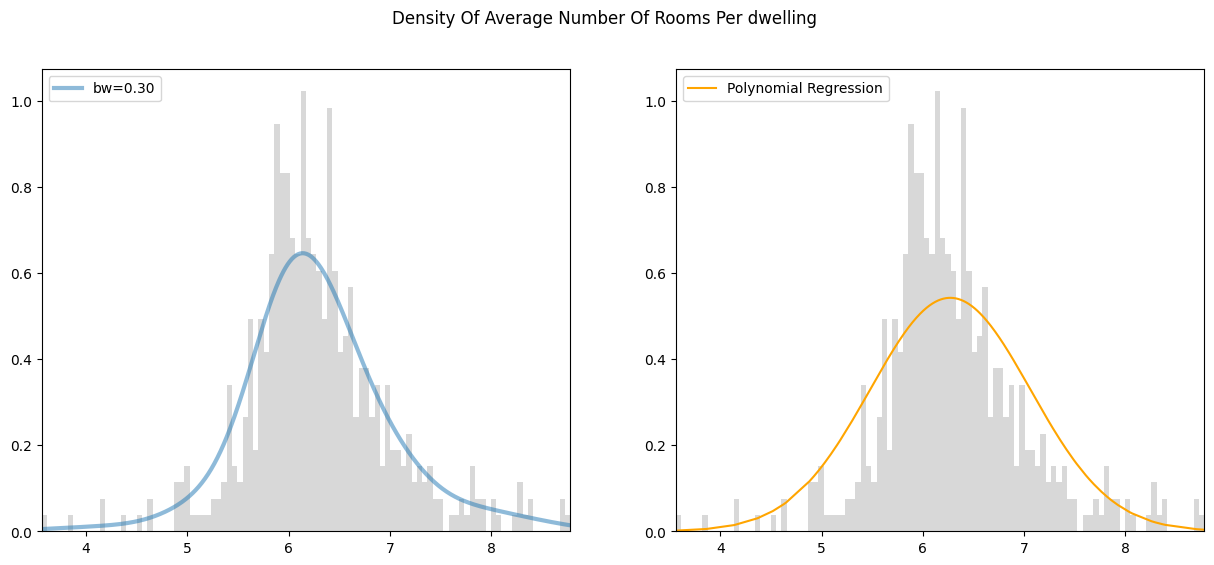

In [86]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

fig, axs = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle("Density Of Average Number Of Rooms Per dwelling")

# Density plot
axs[0].plot(x_grid, pdf, linewidth=3, alpha=0.5, label='bw=%.2f' % kde.bandwidth)
axs[0].hist(RM, 100, fc='gray', histtype='stepfilled', alpha=0.3, density=True)
axs[0].legend(loc='upper left')
axs[0].set_xlim(RM.min(), RM.max())

poly = PolynomialFeatures(degree=2)
x_poly = poly.fit_transform(RM[:, None])
reg = LinearRegression().fit(x_poly, kde.score_samples(RM[:, None]))
y_poly = reg.predict(x_poly)

# Polynomial regression plot | Sorted the number in order to have a more meaningful and smooth curve
sorted_indices = np.argsort(RM)
axs[1].plot(RM[sorted_indices], np.exp(y_poly)[sorted_indices], color="orange", linestyle='-', label="Polynomial Regression")
axs[1].hist(RM, 100, fc='gray', histtype='stepfilled', alpha=0.3, density=True)
axs[1].legend(loc='upper left')
axs[1].set_xlim(RM.min(), RM.max())

# MSE polynomial regression
mse_poly = mean_squared_error(pdf, y_poly)
print("MSE of Polynomial Regression:", mse_poly)

# MSE Density
true_density = 1 / np.sqrt(2 * np.pi) * np.exp(-0.5 * x_grid ** 2)
mse_density = mean_squared_error(true_density, np.exp(kde.score_samples(x_grid[:, None])))
print("MSE of Density Model:", mse_density)

plt.show()


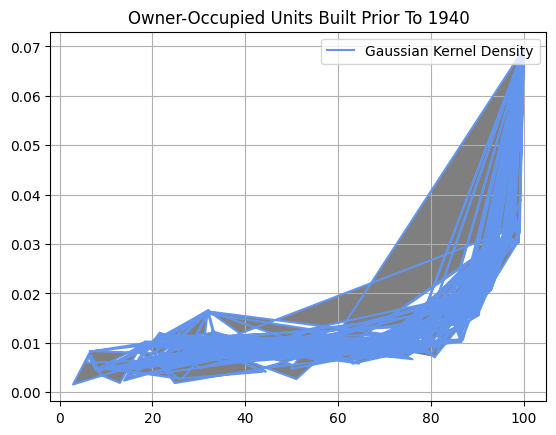

In [ ]:
from sklearn.neighbors import KernelDensity

x = df['AGE'].values.reshape(-1, 1)
fig, ax = plt.subplots()

kde = KernelDensity(kernel='gaussian', bandwidth=0.5).fit(x)
log_dens = kde.score_samples(x)

ax.fill(x, np.exp(log_dens), fc='black', alpha=0.5)
ax.plot(x, np.exp(log_dens), color="cornflowerblue", linestyle='-', label="Gaussian Kernel Density")

ax.set_title("Owner-Occupied Units Built Prior To 1940")
ax.grid(True)
ax.legend(loc='upper right')

plt.show()

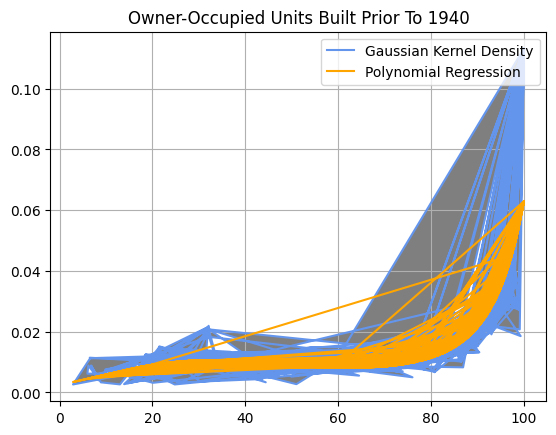

In [ ]:
x = df['AGE'].values.reshape(-1, 1)

kde = KernelDensity(kernel='gaussian', bandwidth=0.3).fit(x)
log_dens = kde.score_samples(x)

poly = PolynomialFeatures(degree=3)
x_poly = poly.fit_transform(x)
reg = LinearRegression().fit(x_poly, log_dens)
y_poly = reg.predict(x_poly)

fig, ax = plt.subplots()

ax.fill(x, np.exp(log_dens), fc='black', alpha=0.5)
ax.plot(x, np.exp(log_dens), color="cornflowerblue", linestyle='-', label="Gaussian Kernel Density")

ax.plot(x, np.exp(y_poly), color="orange", linestyle='-', label="Polynomial Regression")

ax.set_title("Owner-Occupied Units Built Prior To 1940")
ax.grid(True)
ax.legend(loc='upper right')

plt.show()
